<a href="https://colab.research.google.com/github/rodrigovitorino137/Alura_Cash/blob/main/semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='green'>**ALURA CHALLENGES DADOS- SEMANA 2**</font>


#<font color='green'>**Lendo Dados e Tratando Dados**</font>

Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.compose import make_column_transformer


Lendo os dados

In [2]:
df = pd.read_csv('/content/dados_unidos_id.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dados_unidos_id.csv'

In [ ]:
df.sample(5)

As colunas relacionadas aos identificadores possuem valores únicos que não contribuirão para o nosso modelo. Sendo assim, essas colunas serão excluídas.

In [ ]:
df_sem_id = df.copy()
df_sem_id.drop(['id_pessoa', 'id_bc', 'id_emprestimo'], axis = 1, inplace=True)

Vendo os tipos dos dados


In [ ]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   idade_pessoa                           34165 non-null  float64
 1   salario_pessoa                         34430 non-null  float64
 2   situacao_propriedade_pessoa            34154 non-null  object 
 3   tempo_trabalhado_pessoa                33229 non-null  float64
 4   foi_inadimplente_bc                    34119 non-null  object 
 5   tempo_primeira_solicitacao_credito_bc  34482 non-null  float64
 6   motivo_emprestimo                      34174 non-null  object 
 7   pontuacao_emprestimo                   34176 non-null  object 
 8   valor_emprestimo                       34424 non-null  float64
 9   taxa_juros_emprestimo                  30859 non-null  float64
 10  possibilidade_inadimplencia            34142 non-null  float64
 11  po

In [ ]:
for col in df_sem_id.columns:
  print(f"Coluna: {col}")
  if df_sem_id[col].dtype == 'object':
    print(df_sem_id[col].unique())

  else:
    print(df_sem_id[col].dtype)
  print("-" * 30)

Coluna: idade_pessoa
float64
------------------------------
Coluna: salario_pessoa
float64
------------------------------
Coluna: situacao_propriedade_pessoa
['Aluguel' 'Hipoteca' 'Própria' 'Outro' nan]
------------------------------
Coluna: tempo_trabalhado_pessoa
float64
------------------------------
Coluna: foi_inadimplente_bc
['N' 'S' nan]
------------------------------
Coluna: tempo_primeira_solicitacao_credito_bc
float64
------------------------------
Coluna: motivo_emprestimo
['Educativo' 'Médico' 'Pagamento de débitos' 'Pessoal' 'Empreendimento'
 'Melhora do lar' nan]
------------------------------
Coluna: pontuacao_emprestimo
['B' 'A' 'C' 'D' 'E' 'F' nan 'G']
------------------------------
Coluna: valor_emprestimo
float64
------------------------------
Coluna: taxa_juros_emprestimo
float64
------------------------------
Coluna: possibilidade_inadimplencia
float64
------------------------------
Coluna: porcentagem_salario_emprestimo
float64
------------------------------


##<font color='green'>Tratando os dados nulos</font>

In [ ]:
df_sem_id.isna().sum()

idade_pessoa                              320
salario_pessoa                             55
situacao_propriedade_pessoa               331
tempo_trabalhado_pessoa                  1256
foi_inadimplente_bc                       366
tempo_primeira_solicitacao_credito_bc       3
motivo_emprestimo                         311
pontuacao_emprestimo                      309
valor_emprestimo                           61
taxa_juros_emprestimo                    3626
possibilidade_inadimplencia               343
porcentagem_salario_emprestimo             56
dtype: int64

Há um considerável número de valores nulos, e as únicas colunas em que podemos inferir valores com base em outras são 'salario_pessoa', 'valor_emprestimo' e 'porcentagem_salario_emprestimo'. Contudo, esse procedimento já foi realizado no banco de dados. Portanto, procederemos com a exclusão dos registros nulos.

In [ ]:
df_sem_nulo = df_sem_id.copy()
df_sem_nulo.dropna(inplace=True)

In [ ]:
df_sem_nulo.isna().sum()

idade_pessoa                             0
salario_pessoa                           0
situacao_propriedade_pessoa              0
tempo_trabalhado_pessoa                  0
foi_inadimplente_bc                      0
tempo_primeira_solicitacao_credito_bc    0
motivo_emprestimo                        0
pontuacao_emprestimo                     0
valor_emprestimo                         0
taxa_juros_emprestimo                    0
possibilidade_inadimplencia              0
porcentagem_salario_emprestimo           0
dtype: int64

Não há dados duplicados

In [ ]:
df_sem_nulo.duplicated().sum()

137

In [ ]:
df_sem_nulo['possibilidade_inadimplencia'] =df_sem_nulo['possibilidade_inadimplencia'].astype('int')

##<font color='green'>Tratamento de Outliers</font>

In [ ]:
df_sem_nulo.describe()

,idade_pessoa,salario_pessoa,tempo_trabalhado_pessoa,tempo_primeira_solicitacao_credito_bc,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo
count,28668.000000,2.866800e+04,28668.000000,28668.000000,28668.000000,28668.000000,28668.000000,28668.000000
mean,27.727187,6.660708e+04,4.780766,5.793393,9654.383354,11.039202,0.216513,0.169508
std,6.307814,6.233870e+04,4.035247,4.038083,6327.919179,3.229452,0.411875,0.106448
min,20.000000,2.000000e+02,0.000000,2.000000,500.000000,5.420000,0.000000,0.000800
25%,23.000000,3.930900e+04,2.000000,3.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.578300e+04,4.000000,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,8.000000e+04,7.000000,8.000000,12500.000000,13.480000,0.000000,0.230000
max,144.000000,6.000000e+06,41.000000,30.000000,35000.000000,23.220000,1.000000,0.830000


###<font color='green'>Idade do cliente</font>

In [ ]:
fig = px.box(data_frame=df_sem_nulo, x = 'idade_pessoa' )
fig.show()

In [ ]:
df_sem_nulo[df_sem_nulo['idade_pessoa'] >100]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,foi_inadimplente_bc,tempo_primeira_solicitacao_credito_bc,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo
13827,144.0,6000000.0,Hipoteca,12.0,N,25.0,Pessoal,C,5000.0,12.73,0,0.0008
17251,123.0,80004.0,Aluguel,2.0,N,3.0,Educativo,B,20400.0,10.25,0,0.2500
22118,144.0,200000.0,Hipoteca,4.0,N,2.0,Educativo,B,6000.0,11.86,0,0.0300
29209,144.0,250000.0,Aluguel,4.0,N,3.0,Empreendimento,C,4800.0,13.57,0,0.0200


Identificamos algumas pessoas com idade superior a 120 anos, o que é considerado atípico. Além disso, observamos salários excepcionalmente elevados para alguns desses indivíduos. Optaremos pela exclusão desses dados. Importante mencionar que a remoção de quatro linhas em um conjunto de mais de 30.000 não impactará significativamente na análise.

In [ ]:
df_sem_out = df_sem_nulo.copy()
df_sem_out.drop(df_sem_out[df_sem_out['idade_pessoa'] >100].index, inplace=True)
df_sem_out.reset_index(drop = True)
df_sem_out[df_sem_out['idade_pessoa'] >100]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,foi_inadimplente_bc,tempo_primeira_solicitacao_credito_bc,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo


###<font color='green'>Salário do cliente</font>

In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'salario_pessoa' )
fig.show()

É comum observarmos valores atípicos nos salários dos clientes.

###<font color='green'>Tempo de trabalho</font>

In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'tempo_trabalhado_pessoa' )
fig.show()

In [ ]:
df_sem_out[df_sem_out['tempo_trabalhado_pessoa']+14>df_sem_out['idade_pessoa']]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,foi_inadimplente_bc,tempo_primeira_solicitacao_credito_bc,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo


Identificamos a presença de valores atípicos no tempo de trabalho dos clientes. No entanto, considerando a possibilidade de os clientes terem iniciado sua carreira aos 14 anos, não há motivo de preocupação com relação a esses casos específicos.

###<font color='green'>Tempo da primeira solicitacao de credito</font>

In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'tempo_primeira_solicitacao_credito_bc' )
fig.show()

In [ ]:
df_sem_out[df_sem_out['tempo_primeira_solicitacao_credito_bc']+16>df_sem_out['idade_pessoa']]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,foi_inadimplente_bc,tempo_primeira_solicitacao_credito_bc,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo
4400,26.0,39000.0,Aluguel,1.0,N,16.0,Empreendimento,D,5000.0,12.92,1,0.1282
9618,29.0,27000.0,Aluguel,10.0,N,17.0,Melhora do lar,D,2430.0,7.49,0,0.0900
11480,21.0,65253.0,Hipoteca,5.0,N,10.0,Empreendimento,A,3000.0,6.03,0,0.0460


Identificamos casos em que indivíduos solicitaram crédito com idade inferior a 16 anos, uma prática incomum e passível de negação por parte dos bancos. Dessa forma, optaremos por excluir esses registros, considerando-os inconsistentes.

In [ ]:
df_sem_out.drop(df_sem_out[df_sem_out['tempo_primeira_solicitacao_credito_bc']+16>df_sem_out['idade_pessoa']].index, inplace = True)
df_sem_out[df_sem_out['tempo_primeira_solicitacao_credito_bc']+16>df_sem_out['idade_pessoa']]

,idade_pessoa,salario_pessoa,situacao_propriedade_pessoa,tempo_trabalhado_pessoa,foi_inadimplente_bc,tempo_primeira_solicitacao_credito_bc,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo


###<font color='green'>Valor de emprestimo</font>

In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'valor_emprestimo' )
fig.show()

Nada de anormal

###<font color='green'>Taxa de juros</font>

In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'taxa_juros_emprestimo' )
fig.show()

Nada de anormal

###<font color='green'>Porcentagem entre salário e empréstimo</font>


In [ ]:
fig = px.box(data_frame=df_sem_out, x = 'porcentagem_salario_emprestimo' )
fig.show()

Nada de anormal.

##<font color='green'>Analise De Correlação Entre As Variáveis</font>

In [ ]:
# Calcula as contagens das combinações Curso-Target
contagem = df_sem_out.groupby(["situacao_propriedade_pessoa", "possibilidade_inadimplencia"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("situacao_propriedade_pessoa")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Mapeia os valores 0 e 1 para as cores 'red' e 'black'
contagem['possibilidade_inadimplencia'] = contagem['possibilidade_inadimplencia'].map({0: 'Não', 1: 'Sim'})

# Cria o gráfico interativo
fig = px.bar(contagem, y='situacao_propriedade_pessoa', x='Porcentagem', color='possibilidade_inadimplencia',
             orientation='h', color_discrete_map={'Sim': 'red', 'Não': 'blue'},
             labels={"possibilidade_inadimplencia": 'Possibilidade de Inadimplencia'})

fig.update_layout(font_family = 'DejaVu Sans', font_size=15,
                  title_font_size=24,
                  title_text='Gráfico de porcentagem por situação da propriedade do cliente' +
                             '<br><sup size=1 style="color:#555655">Por Possibilidade de Inadinplência</sup>',
                  xaxis_title='', yaxis_title='')


fig.update_xaxes(ticksuffix="%")
fig.update_layout(hovermode="closest")

# Mostra o gráfico
fig.show()


A constatação de que a propriedade do cliente tem uma influência significativa na possibilidade de inadimplência é observação relevante. Nota-se que clientes que residem em imóveis alugados apresentam uma probabilidade mais elevada de inadimplência. Este entendimento pode ser crucial na formulação de estratégias para gerenciar riscos e otimizar as práticas de concessão de crédito.

In [ ]:
# Calcula as contagens das combinações Curso-Target
contagem = df_sem_out.groupby(["motivo_emprestimo", "possibilidade_inadimplencia"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("motivo_emprestimo")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Mapeia os valores 0 e 1 para as cores 'red' e 'black'
contagem['possibilidade_inadimplencia'] = contagem['possibilidade_inadimplencia'].map({0: 'Não', 1: 'Sim'})

# Cria o gráfico interativo
fig = px.bar(contagem, y='motivo_emprestimo', x='Porcentagem', color='possibilidade_inadimplencia',
             orientation='h', color_discrete_map={'Sim': 'red', 'Não': 'blue'},
             labels={"possibilidade_inadimplencia": 'Possibilidade de Inadimplencia'})

fig.update_layout(font_family = 'DejaVu Sans', font_size=15,
                  title_font_size=24,
                  title_text='Gráfico De Porcentagem Por Motivo do Empréstimo' +
                             '<br><sup size=1 style="color:#555655">Por Possibilidade de Inadinplência</sup>',
                  xaxis_title='', yaxis_title='')


fig.update_xaxes(ticksuffix="%")
fig.update_layout(hovermode="closest")

# Mostra o gráfico
fig.show()


A observação de que o motivo do empréstimo também tem um impacto significativo é valiosa. Identificar como diferentes motivos de empréstimo influenciam a possibilidade de inadimplência oferece insights importantes para a compreensão do comportamento financeiro dos clientes. Essa percepção pode orientar estratégias específicas na avaliação de riscos e na tomada de decisões relacionadas à concessão de empréstimos.

In [ ]:
# Calcula as contagens das combinações Curso-Target
contagem = df_sem_out.groupby(["pontuacao_emprestimo", "possibilidade_inadimplencia"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("pontuacao_emprestimo")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Mapeia os valores 0 e 1 para as cores 'red' e 'black'
contagem['possibilidade_inadimplencia'] = contagem['possibilidade_inadimplencia'].map({0: 'Não', 1: 'Sim'})

# Cria o gráfico interativo
fig = px.bar(contagem, y='pontuacao_emprestimo', x='Porcentagem', color='possibilidade_inadimplencia',
             orientation='h', color_discrete_map={'Sim': 'red', 'Não': 'blue'},
             labels={"possibilidade_inadimplencia": 'Possibilidade de Inadimplencia'})

fig.update_layout(font_family = 'DejaVu Sans', font_size=15,
                  title_font_size=24,
                  title_text='Gráfico De Porcentagem Por Pontuação Do Empréstimo' +
                             '<br><sup size=1 style="color:#555655">Por Possibilidade de Inadinplência</sup>',
                  xaxis_title='', yaxis_title='')


fig.update_xaxes(ticksuffix="%")
fig.update_layout(hovermode="closest")

# Mostra o gráfico
fig.show()

A pontuação do empréstimo parece ser a variável que mais influencía.

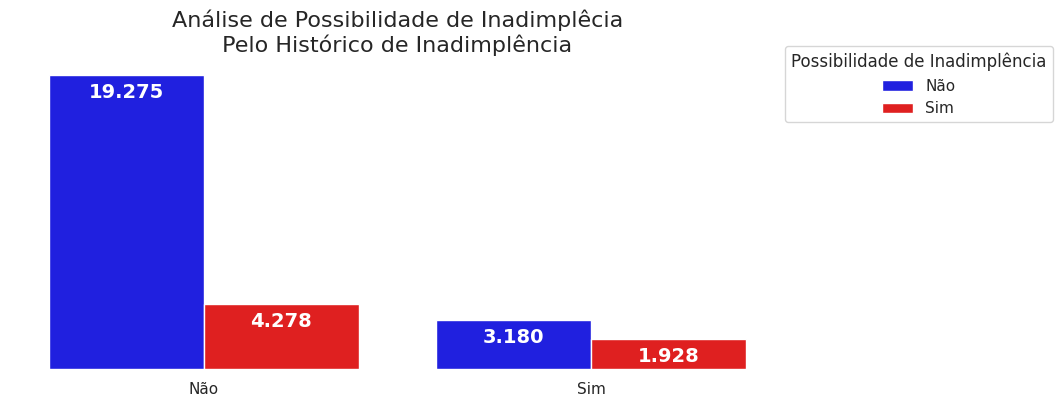

In [ ]:
sns.set_theme(style = 'white')
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(data = df_sem_out, x ='foi_inadimplente_bc' , hue = 'possibilidade_inadimplencia', palette = ['blue', 'red'])
ax.legend(title='Possibilidade de Inadimplência', labels=['Não', 'Sim'], loc = (1, 0.8))
ax.set_title("Análise de Possibilidade de Inadimplêcia\n Pelo Histórico de Inadimplência ", fontsize=16)

for index, barra in enumerate(ax.patches[:4]):
    pos_x = barra.get_x() + barra.get_width() / 2
    pos_y = barra.get_height()
    quantidade = f'{pos_y:,.0f}'.replace(',','.')
    ax.text(x = pos_x, y = pos_y -1500 , s = quantidade,color = 'white', ha='center', fontsize=14, fontweight ='bold')
sns.despine(left= True, bottom = True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Não', 'Sim']))
ax.set_yticklabels([])
plt.show()

Parece que os clientes que já foram inadimplentes tem uma alta possibilidade em se tornar inadimplente novamente.

In [ ]:
df_sem_out.corr()

<ipython-input-36-7a132f3e8951>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,idade_pessoa,salario_pessoa,tempo_trabalhado_pessoa,tempo_primeira_solicitacao_credito_bc,valor_emprestimo,taxa_juros_emprestimo,possibilidade_inadimplencia,porcentagem_salario_emprestimo
idade_pessoa,1.000000,0.141497,0.175932,0.877364,0.055884,0.010355,-0.022399,-0.039477
salario_pessoa,0.141497,1.000000,0.160727,0.122967,0.324279,-0.003625,-0.166845,-0.297549
tempo_trabalhado_pessoa,0.175932,0.160727,1.000000,0.151419,0.108039,-0.058087,-0.086584,-0.060321
tempo_primeira_solicitacao_credito_bc,0.877364,0.122967,0.151419,1.000000,0.045529,0.015489,-0.015535,-0.030019
valor_emprestimo,0.055884,0.324279,0.108039,0.045529,1.000000,0.146095,0.113555,0.577334
taxa_juros_emprestimo,0.010355,-0.003625,-0.058087,0.015489,0.146095,1.000000,0.339095,0.123443
possibilidade_inadimplencia,-0.022399,-0.166845,-0.086584,-0.015535,0.113555,0.339095,1.000000,0.379756
porcentagem_salario_emprestimo,-0.039477,-0.297549,-0.060321,-0.030019,0.577334,0.123443,0.379756,1.000000


A identificação de uma alta correlação entre as variáveis 'valor_empréstimo' e 'porcentagem_salario_emprestimo', bem como entre 'idade_pessoa' e 'tempo_primeira_solicitacao_credito_bc', é um insight valioso. Remover uma das variáveis correlacionadas ajuda a evitar redundância no modelo, contribuindo para uma representação mais eficiente e simplificada. Este procedimento pode melhorar a interpretabilidade do modelo e evitar multicolinearidade.

In [ ]:
df_sem_out.drop(['porcentagem_salario_emprestimo', 'tempo_primeira_solicitacao_credito_bc'], inplace=True, axis = 1)
df_sem_out.reset_index(drop=True, inplace = True)

In [ ]:
df_sem_out.to_csv('dados_inadimplencia_tratados.csv')

#<font color='green'>**MACHINE LEARNING**</font>

##<font color='green'>Encoding</font>


In [ ]:
X = df_sem_out.drop('possibilidade_inadimplencia', axis =1)
y = df_sem_out['possibilidade_inadimplencia']

In [ ]:
colunas_c =[]
for col in df_sem_out.columns:
  if df_sem_out[col].dtype == 'object':
    colunas_c.append(col)

In [ ]:
colunas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    colunas_c
),
    remainder = 'passthrough',
    sparse_threshold=0)
X = one_hot.fit_transform(X)
nomes_colunas = [col.replace("onehotencoder__", "").replace("remainder__", "") for col in one_hot.get_feature_names_out(colunas)]
X =pd.DataFrame(X, columns = nomes_colunas)

In [ ]:
X.columns

Index(['situacao_propriedade_pessoa_Aluguel',
       'situacao_propriedade_pessoa_Hipoteca',
       'situacao_propriedade_pessoa_Outro',
       'situacao_propriedade_pessoa_Própria', 'motivo_emprestimo_Educativo',
       'motivo_emprestimo_Empreendimento', 'motivo_emprestimo_Melhora do lar',
       'motivo_emprestimo_Médico', 'motivo_emprestimo_Pagamento de débitos',
       'motivo_emprestimo_Pessoal', 'pontuacao_emprestimo_A',
       'pontuacao_emprestimo_B', 'pontuacao_emprestimo_C',
       'pontuacao_emprestimo_D', 'pontuacao_emprestimo_E',
       'pontuacao_emprestimo_F', 'pontuacao_emprestimo_G', 'idade_pessoa',
       'salario_pessoa', 'tempo_trabalhado_pessoa', 'foi_inadimplente_bc',
       'valor_emprestimo', 'taxa_juros_emprestimo'],
      dtype='object')

##<font color='green'>Separando dados</font>

Identificamos um desequilíbrio na variável alvo. Portanto, planejamos balanceá-la e avaliar qual abordagem é mais adequada: oversampling ou undersampling.

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, stratify=y)

In [ ]:
y.value_counts(normalize=True)

0    0.783469
1    0.216531
Name: possibilidade_inadimplencia, dtype: float64

##<font color='green'>Criando  e Testando Modelos de Machine Learning</font>

Criando uma função onde nós iremos avaliar as métricas dos modelos.

In [ ]:
def intervalo_conf(modelos, nomes):
  medias_acuracia = []
  medias_recall = []
  intervalos_acuracia = []
  intervalos_recall = []

  for modelo, nome in zip(modelos, nomes):

    validacao_c = cross_validate(modelo, x_treino, y_treino, cv = skf, scoring =('recall','accuracy'), n_jobs=-1)

    media_acuracia = validacao_c['test_accuracy'].mean()
    medias_acuracia.append(round(media_acuracia, 2))

    media_recall = validacao_c['test_recall'].mean()
    medias_recall.append(round(media_recall, 2))

    desvio_padrao_acuracia = validacao_c['test_accuracy'].std()
    desvio_padrao_recall = validacao_c['test_recall'].std()

    intervalos_acuracia.append(f'({(media_acuracia - 2*desvio_padrao_acuracia):.2f}, {min(media_acuracia + 2*desvio_padrao_acuracia, 1):.2f})')
    intervalos_recall.append(f'({(media_recall - 2*desvio_padrao_recall):.2f}, {min(media_recall + 2*desvio_padrao_recall, 1):.2f})')

  return pd.DataFrame({'Média - Acurácia': medias_acuracia, 'Intervalo de confiança - Acurácia':intervalos_acuracia,
                         'Média - Recall': medias_recall, 'Intervalo de confiança - Recall':intervalos_recall,
                          } , index = nomes)

In [ ]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 101)

Criando os modelos para comparação.

In [ ]:
model_xgb_over = Pipeline([('over', SMOTE()), ('xgboost', XGBClassifier(objective='binary:logistic'))])
model_xgb_under = Pipeline([('under', NearMiss(version = 3)), ('xgboost', XGBClassifier(objective='binary:logistic'))])

In [ ]:
model_lr_over = Pipeline([ ('oversample', SMOTE()), ('scaler', StandardScaler()), ('lr', LogisticRegression())])
model_lr_under = Pipeline([ ('undersample', NearMiss(version = 3)), ('scaler', StandardScaler()),
                           ('lr', LogisticRegression())])

In [ ]:
model_knn_over = Pipeline([('oversample', SMOTE()), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

model_knn_under = Pipeline([('undersample', NearMiss(version = 3)), ('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier(n_jobs = -1))])


In [ ]:
model_abc_over = Pipeline([('over', SMOTE()), ('abc', AdaBoostClassifier())])
model_abc_under = Pipeline([('under', NearMiss(version = 3)), ('abc', AdaBoostClassifier())])

In [ ]:
model_svc_over = Pipeline([('oversample', SMOTE()), ('scaler', StandardScaler()), ('svc', SVC())])

model_svc_under = Pipeline([('undersample', NearMiss(version = 3)), ('scaler', StandardScaler()),
 ('svc', SVC())])

In [ ]:
modelos = [model_xgb_over, model_xgb_under, model_lr_over, model_lr_under, model_knn_over, model_knn_under,
           model_abc_over, model_abc_under, model_svc_over, model_svc_under]
nomes = ['XGBOOST(OVER)', 'XGBOOST(UNDER)', 'LogisticRegression(OVER)', 'LogisticRegression(UNDER)',
         'KNeighborsClassifier(OVER)', 'KNeighborsClassifier (UNDER)', 'AdaBoostClassifier(OVER)', 'AdaBoostClassifier(UNDER)', 'SVC(OVER)', 'SVC(UNDER)']
resultados = intervalo_conf(modelos, nomes)

Vamos direcionar nossa atenção para a métrica de recall, pois nosso objetivo é identificar o maior número possível de clientes potenciais propensos a serem inadimplentes.

In [ ]:
resultados.sort_values(by ='Média - Recall' ,ascending=False)

,Média - Acurácia,Intervalo de confiança - Acurácia,Média - Recall,Intervalo de confiança - Recall
XGBOOST(UNDER),0.89,"(0.88, 0.90)",0.79,"(0.75, 0.83)"
AdaBoostClassifier(UNDER),0.80,"(0.78, 0.82)",0.75,"(0.71, 0.79)"
XGBOOST(OVER),0.93,"(0.92, 0.94)",0.74,"(0.70, 0.77)"
SVC(UNDER),0.85,"(0.84, 0.86)",0.74,"(0.70, 0.77)"
LogisticRegression(OVER),0.80,"(0.79, 0.82)",0.73,"(0.70, 0.76)"
LogisticRegression(UNDER),0.79,"(0.78, 0.80)",0.73,"(0.69, 0.77)"
KNeighborsClassifier (UNDER),0.79,"(0.78, 0.80)",0.72,"(0.68, 0.75)"
SVC(OVER),0.90,"(0.89, 0.91)",0.63,"(0.60, 0.67)"
KNeighborsClassifier(OVER),0.85,"(0.84, 0.87)",0.62,"(0.57, 0.66)"
AdaBoostClassifier(OVER),0.85,"(0.84, 0.86)",0.59,"(0.53, 0.65)"


Observamos que o modelo mais promissor para nossos objetivos é o XGBOOST, utilizando a técnica de balanceamento undersampling. Ele apresenta métricas satisfatórias, no entanto, planejamos otimizá-lo ainda mais por meio de ajustes de hiperparâmetros.

##<font color='green'>Otimizando o melhor modelo</font>

A seguir, procederemos com a otimização do modelo através da configuração de hiperparâmetros. Para assegurar maior rigor em nossos resultados, implementaremos uma validação cruzada aninhada.

In [ ]:
params = {
    'xgboost__learning_rate': [0.1, 0.2, 0.3],
    'xgboost__max_depth': [0, 2, 4, 6, 10],
    'xgboost__colsample_bytree': [0.1, 0.5, 1],
    'xgboost__n_estimators': [10, 25, 50]
}

In [ ]:
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_nested_gs = GridSearchCV(estimator = Pipeline([('under', NearMiss(version = 3)),
                                        ('xgboost', XGBClassifier(objective='binary:logistic'))]),
                               param_grid = params,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = inner_cv)

xgb_nested_scores = cross_val_score(xgb_nested_gs, x_treino, y_treino, cv=outer_cv)

In [ ]:
print("Métricas de desempenho para cada iteração do CV externo:", xgb_nested_scores)
print(f"Média da métrica recall de desempenho do CV externo: {xgb_nested_scores.mean():.4f}")
xgb_nested_gs.fit(x_treino, y_treino)
best_params_lr = xgb_nested_gs.best_params_
print("Melhores hiperparâmetros:", best_params_lr)

Métricas de desempenho para cada iteração do CV externo: [0.81495809 0.80012895 0.7931701 ]
Média da métrica recall de desempenho do CV externo: 0.8028
Melhores hiperparâmetros: {'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 0, 'xgboost__n_estimators': 50}


Realizaremos o retrabalho dos nossos modelos otimizados, seguido por uma nova execução da validação cruzada.

In [ ]:
best_xgb = Pipeline([('under', NearMiss(version = 3)),
 ('xgboost', XGBClassifier(objective='binary:logistic', colsample_bytree= 0.5, learning_rate= 0.2, max_depth = 0, n_estimators = 50))])

In [ ]:
resultados = intervalo_conf([best_xgb], ['XGBOOST - BEST'])
resultados

,Média - Acurácia,Intervalo de confiança - Acurácia,Média - Recall,Intervalo de confiança - Recall
XGBOOST - BEST,0.86,"(0.85, 0.87)",0.8,"(0.77, 0.83)"


A observação de uma melhoria na média do recall em conjunto com uma piora na acurácia é consistente com a dinâmica comum na otimização de modelos. Muitas vezes, ao ajustarmos parâmetros para melhorar o desempenho em uma métrica específica, isso pode resultar em um impacto adverso em outras métricas.


##<font color='green'>Testando modelo</font>

Vamos testar o modelo com os melhores hiperparâmetros com os dados de teste usando o undersampling.

In [ ]:
under = NearMiss(version=3)
x_balanceado, y_balanceado = under.fit_resample(x_treino, y_treino)

In [ ]:
modelo_xgb = XGBClassifier(objective='binary:logistic', colsample_bytree= 0.5, learning_rate= 0.2, max_depth = 0, n_estimators = 50)
modelo_xgb.fit(x_balanceado, y_balanceado)
y_previsto_xgb = modelo_xgb.predict(x_teste)

print(classification_report(y_teste, y_previsto_xgb))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5614
           1       0.68      0.80      0.73      1552

    accuracy                           0.87      7166
   macro avg       0.81      0.85      0.83      7166
weighted avg       0.88      0.87      0.88      7166



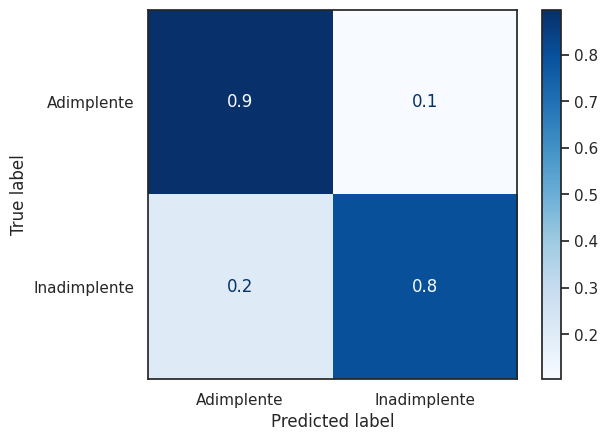

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelo_xgb, x_teste, y_teste, display_labels=['Adimplente', 'Inadimplente'],
                                      normalize='true', cmap='Blues');


O modelo XGBClassifier demonstrou eficácia; agora procederemos à exportação.

In [ ]:
joblib.dump(modelo_xgb, 'modelo_xgb.pkl')

['modelo_xgb.pkl']

In [ ]:
joblib.dump(one_hot, 'modelo_onehotenc.pkl')

['modelo_onehotenc.pkl']